In [1]:
# importing libraries
import random
from base64 import b64decode
from json import loads
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

In [2]:
# import the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

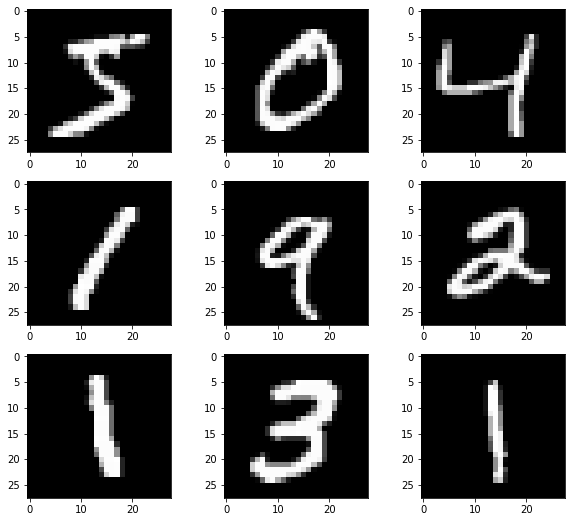

In [4]:
# Displaying a grid of 3x3 images
plt.gray()
plt.figure(figsize = (10,9)) 
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [5]:
# Data Normalization
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [6]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
# kmeans and the number of clusters
total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
print(kmeans.fit(X_train))
kmeans.labels_

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=10)


array([7, 4, 1, ..., 7, 5, 0])

In [8]:
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
print(kmeans.fit(X_train))
kmeans.labels_

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=10)


array([4, 3, 2, ..., 4, 0, 4])

In [9]:
#assign cluster to each label
def retrieve_info(cluster_labels , y_train):
    reference_labels={}
    for i in range(len(np.unique(kmeans.labels_))):
        index=np.where(cluster_labels==i , 1 , 0)
        num=np.bincount(y_train[index==1]).argmax()
        reference_labels[i]=num
    return reference_labels

In [10]:
#find the number of labels
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [11]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[8 0 4 1 7 2 1 3 1 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [12]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5576833333333333


In [13]:
# Function to calculate metrics for the model
def calculate_metrics(model,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [14]:
# Testing model on Testing set
# Fitting the model to testing set
# Calculating the metrics
# Calculating the reference_labels
# ‘number_labels’ is a list which denotes the number displayed in image
kmeans = MiniBatchKMeans(n_clusters = 5)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of clusters is 5
Inertia : 441236.375
Homogeneity :       0.2920305533326313
Accuracy score : 0.3949




In [15]:
# Testing model on Testing set
# Fitting the model to testing set
# Calculating the metrics
# Calculating the reference_labels
# ‘number_labels’ is a list which denotes the number displayed in image
kmeans = MiniBatchKMeans(n_clusters = 10)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of clusters is 10
Inertia : 395387.34375
Homogeneity :       0.4737813539941736
Accuracy score : 0.5648




In [16]:
# Testing model on Testing set
# Fitting the model to testing set
# Calculating the metrics
# Calculating the reference_labels
# ‘number_labels’ is a list which denotes the number displayed in image
kmeans = MiniBatchKMeans(n_clusters = 20)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of clusters is 20
Inertia : 352139.46875
Homogeneity :       0.6213284220909482
Accuracy score : 0.7216




In [17]:
# Testing model on Testing set
# Fitting the model to testing set
# Calculating the metrics
# Calculating the reference_labels
# ‘number_labels’ is a list which denotes the number displayed in image
kmeans = MiniBatchKMeans(n_clusters = 100)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of clusters is 100
Inertia : 275487.53125
Homogeneity :       0.801209792712772
Accuracy score : 0.8569




In [18]:
# Testing model on Testing set
# Fitting the model to testing set
# Calculating the metrics
# Calculating the reference_labels
# ‘number_labels’ is a list which denotes the number displayed in image
kmeans = MiniBatchKMeans(n_clusters = 150)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of clusters is 150
Inertia : 261404.03125
Homogeneity :       0.8361950074808884
Accuracy score : 0.8826




In [19]:
# Testing model on Testing set
# Fitting the model to testing set
# Calculating the metrics
# Calculating the reference_labels
# ‘number_labels’ is a list which denotes the number displayed in image
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 number_labels[i] = reference_labels[kmeans.labels_[i]]
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

C:\Users\ParsaRz\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1045: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Number of clusters is 256
Inertia : 239263.59375
Homogeneity :       0.8628848841763034
Accuracy score : 0.9017




In [20]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_

In [21]:
centroids.shape

(256, 784)

In [22]:
#reshape the cenroids
#nullify the normalization effect by multiplying by 255
centroids = centroids.reshape(256,28,28)
centroids = centroids * 255

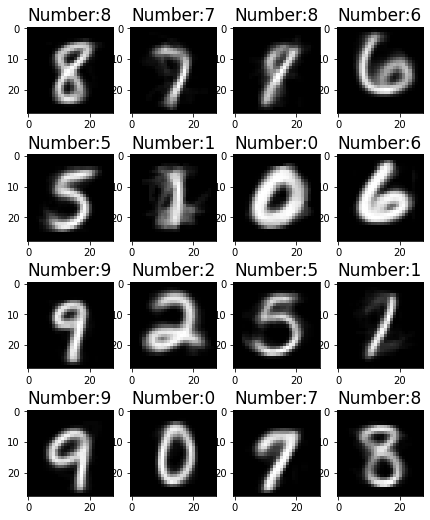

In [23]:
#visualize the cluster centroids.
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
 plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])